https://nbviewer.jupyter.org/format/slides/github/ljcohen/osmotic/blob/master/notebooks/Whitehead_lab_mtg_10.21.2016.ipynb#/

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Comparative gene expression profiling associated with adaptation to osmotic stress tolerance

## ... a status update

Lisa Cohen

Whitehead lab meeting

10.21.2016

# Background:

* RNA is the key intermediate between the genome and proteome
* Many benefits of mRNA sequencing
* NO such thing as an optimal pipeline/workflow for gene expression analysis, especially with "nonmodel" species
* Best practices, e.g. Conesa et al. 2016
* Eel pond protocol: https://khmer-protocols.readthedocs.io/en/ctb/mrnaseq/

# Conclusion: 

Runing software == EASY 

Interpretation, e.g. whether or not output is trustworthy == HARD

# Nonmodel RNAseq Workflow

1. Raw reads - YAY!

(commence plugging into the matrix of the commandline)

2. QC, e.g. fastqc, trim adapters
3. Diginorm: https://dib-lab.github.io/zen-khmer/intro.html
4. De novo transcriptome assembly
5. Annotate
6. Differential gene expression
7. Evaluate results, make sense?
8. If not, repeat steps above


# De novo assembly pipeline methods development

* Titus Brown's lab for "Data Intensive Biology"
* De novo transcriptome re-assemblies of RNAseq data from Marine Microbial Eukaryotic Transcriptome Sequencing Project (MMETSP)
* 678 samples, 40 divergent phyla = 1 TB raw data (largest publicly available RNAseq dataset from diversity of species)
* transcriptome assemblies = 21 GB 
* finished, automated pipeline methods development took 1 yr
* Quantitative evaluation of transcriptome qualities
* "How did my transcriptome do?", e.g. 80th percentile in terms of ___ (fill in the blank metric)

https://github.com/ljcohen/MMETSP/blob/master/notebooks/reads_correlations.ipynb

# Osmotic tolerance in killifish

* Awesome experimental design (draw on board) 
* RNAseq, 3 lanes data
* Mapping to _F heteroclitus_ genome vs. _de novo_ assemblies?

<img src="img/Whitehead_2010_Fig4.png" width="600">

# Workflow status

* QC
* Diginorm
* De novo transcriptomes
* Annotation, 2 different ways: 
    1.) _F heteroclius_ genome alignment
    2.) dammit (homology-based)
* gene expression counts with salmon using annotation #1
* Differential expression analysis with DESeq per species (not what we want)
* phylogenetic comparative approach (Whitehead and Crawford 2006)

In [49]:
data_table = pd.read_table("../evaluation_data/trim_reads_data.txt",sep="\t")
genus_species = data_table.groupby(["Genus_species"])

In [50]:
genus_species['Genus_species'].count()

Genus_species
A_xenica               9
F_catanatus            7
F_chrysotus            8
F_diaphanus            7
F_grandis              9
F_heteroclitus.MDPL    9
F_heteroclitus.MDPP    9
F_notatus              9
F_notti                2
F_olivaceous           8
F_parvapinis           8
F_rathbuni             9
F_sciadicus            5
F_similis              9
F_zebrinus             4
L_goodei               9
L_parva                9
Name: Genus_species, dtype: int64

In [65]:
#input_reads = genus_species['Input Reads'].aggregate(np.sum)
#plot_input_reads=sns.barplot(y="Genus_species",x="Input Reads",data=data_table,palette="BuGn_d")
#sns.set_style("white")
#sns.despine()
genus_species['Input Reads'].aggregate(np.sum)

Genus_species
A_xenica               125785857
F_catanatus            165105977
F_chrysotus            129963482
F_diaphanus            100265388
F_grandis              234670168
F_heteroclitus.MDPL    160537906
F_heteroclitus.MDPP    138535385
F_notatus              175537383
F_notti                 23348494
F_olivaceous           101434157
F_parvapinis            92590817
F_rathbuni             175121439
F_sciadicus             60660884
F_similis              104114099
F_zebrinus              49374145
L_goodei               110021826
L_parva                127960850
Name: Input Reads, dtype: int64

In [12]:
genus_species['Surviving Reads'].aggregate(np.sum)

Genus_species
A_xenica               124896387
F_catanatus            163773269
F_chrysotus            128930681
F_diaphanus             99585589
F_grandis              232934560
F_heteroclitus.MDPL    159472226
F_heteroclitus.MDPP    137479701
F_notatus              174240506
F_notti                 23128243
F_olivaceous           100744146
F_parvapinis            91731205
F_rathbuni             173730062
F_sciadicus             60168096
F_similis              103381764
F_zebrinus              48979988
L_goodei               109203206
L_parva                127294467
Name: Surviving Reads, dtype: int64

In [74]:
diginorm_table = pd.read_table("../evaluation_data/diginorm_stats.txt",sep="\t")
diginorm_table

,species,Diginorm_bysample,Reads_Input,Diginorm_byspecies,Unique kmers,Percent_surviving
0,F_sciadicus,61759566,101937160,37932302,929778741,37.2
1,F_chrysotus,120615027,258850289,66146703,1434123391,25.6
2,F_diaphanus,101068831,137246213,46692192,1046979112,34.0
3,F_notti,25174771,46463472,21860955,493595457,47.0
4,F_similis,104168148,207444577,63352801,1420704983,30.5
5,F_parvapinis,82583659,184254591,50597794,1231605484,27.5
6,A_xenica,121262927,250627759,62070035,1366099384,24.8
7,F_heteroclitus.MDPL,269884267,319925008,79472815,1570605946,24.8
8,F_heteroclitus.MDPP,269884267,275951932,77784067,1593032868,28.2
9,F_rathbuni,151546112,348759075,79184398,1603165556,22.7


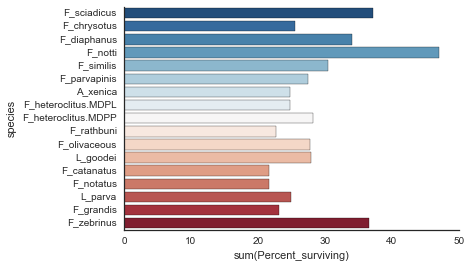

In [93]:
diginorm_reads=sns.barplot(y='species',x='Percent_surviving',data=diginorm_table,palette="RdBu_r",estimator=sum)
sns.set_style("white")
sns.despine()

In [70]:
# reference_used = "/home/ljcohen/reference/kf2evg367mixx11/kfish2evg367mixx11pub2.mrna"
transrate_data = pd.read_csv("../evaluation_data/osmotic_killifish_transrate_data.csv")
transrate_data.head()

,species,assembly,CRBB_hits,at_skew,bases_n,cov25,cov50,cov75,cov85,cov95,...,p_cov50,p_cov75,p_cov85,p_cov95,p_refs_with_CRBB,proportion_n,rbh_per_reference,reference_coverage,score,smallest
0,F_sciadicus,/home/ljcohen/msu_assemblies_finished/F_sciadi...,130350,0.00741,0,16892,11481,6942,5218,3350,...,0.10434,0.06309,0.04742,0.03045,0.40657,0,1.18467,0.12068,NaN,224
1,F_chrysotus,/home/ljcohen/msu_assemblies_finished/F_chryso...,138437,0.00566,0,17907,12667,7852,5915,3918,...,0.11512,0.07136,0.05376,0.03561,0.42360,0,1.25816,0.13059,NaN,224
2,F_diaphanus,/home/ljcohen/msu_assemblies_finished/F_diapha...,185108,0.00715,0,19844,12971,7689,5886,3901,...,0.11788,0.06988,0.05349,0.03545,0.48774,0,1.68233,0.13775,NaN,224
3,F_notti,/home/ljcohen/msu_assemblies_finished/F_notti/...,49312,0.00603,0,9205,6114,3656,2694,1758,...,0.05557,0.03323,0.02448,0.01598,0.22949,0,0.44816,0.06534,NaN,224
4,F_similis,/home/ljcohen/msu_assemblies_finished/F_simili...,140898,0.00627,0,16828,11257,6826,5081,3286,...,0.10231,0.06204,0.04618,0.02986,0.42877,0,1.28053,0.12048,NaN,224


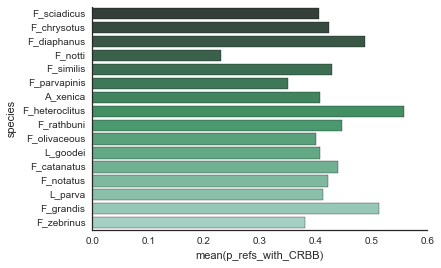

In [26]:
p_refs_CRBB=sns.barplot(y='species',x='p_refs_with_CRBB',data=transrate_data,palette="BuGn_d")
sns.set_style("white")
sns.despine()

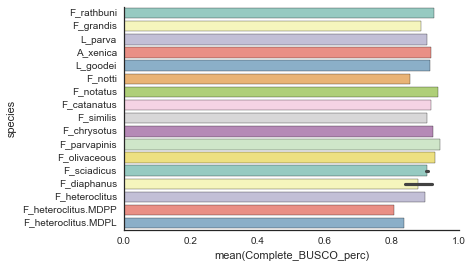

In [96]:
busco_scores = pd.read_csv("../evaluation_data/busco_scores.csv")
#busco_scores
p_refs_CRBB=sns.barplot(y='species',x='Complete_BUSCO_perc',data=busco_scores,palette="Set3")
sns.set_style("white")
sns.despine()

# weird counts (1 sample)
<img src="img/image_ordered_sample1.png">

# Bad PCA
<img src="img/PCA.png">

# Worse heatmap
<img src="img/heatmap_separate.png">

# Transcriptome alignment to reference
* too many contigs
* (BWA also probably not the best way to get a transcriptome alignment)
<img src="img/igv_killifish.png">

# To-do
* Re-do everything: 
- assemblies
- annotations, 
- salmon quants,
- differential expression analysis
* compare dammit annotations to reference-based annotations
* If still a ton of contigs, RapClust contigs

# Future
- pathway discovery, unsupervised neural network
- compare with branch site testing